In [3]:
import numpy as np
import pandas as pd
from datetime import datetime

df1 = pd.read_excel(r'C:\Users\HP\Downloads\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df1.columns = df1.iloc[0]
df1.drop(df1.index[0],inplace=True, axis = 0)
df1 = df1[df1['order_status'] == 'Approved']
df1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = df1[['customer_id','transaction_date']].copy(deep=True)
df2

,customer_id,transaction_date
1,2950,2017-02-25 00:00:00
2,3120,2017-05-21 00:00:00
3,402,2017-10-16 00:00:00
4,3135,2017-08-31 00:00:00
5,787,2017-10-01 00:00:00
...,...,...
19996,1018,2017-06-24 00:00:00
19997,127,2017-11-09 00:00:00
19998,2284,2017-04-14 00:00:00
19999,2764,2017-07-03 00:00:00


In [5]:
df2['YM']= df2.apply(lambda x: int(datetime.strftime(x.transaction_date, "%Y%m")), axis=1)
df2

,customer_id,transaction_date,YM
1,2950,2017-02-25 00:00:00,201702
2,3120,2017-05-21 00:00:00,201705
3,402,2017-10-16 00:00:00,201710
4,3135,2017-08-31 00:00:00,201708
5,787,2017-10-01 00:00:00,201710
...,...,...,...
19996,1018,2017-06-24 00:00:00,201706
19997,127,2017-11-09 00:00:00,201711
19998,2284,2017-04-14 00:00:00,201704
19999,2764,2017-07-03 00:00:00,201707


In [6]:
start_month = min(df2.YM)
start_month

201701

In [7]:
df2['transaction_month_index'] = df2.YM.apply(lambda x: x - start_month)
df2

,customer_id,transaction_date,YM,transaction_month_index
1,2950,2017-02-25 00:00:00,201702,1
2,3120,2017-05-21 00:00:00,201705,4
3,402,2017-10-16 00:00:00,201710,9
4,3135,2017-08-31 00:00:00,201708,7
5,787,2017-10-01 00:00:00,201710,9
...,...,...,...,...
19996,1018,2017-06-24 00:00:00,201706,5
19997,127,2017-11-09 00:00:00,201711,10
19998,2284,2017-04-14 00:00:00,201704,3
19999,2764,2017-07-03 00:00:00,201707,6


In [8]:
df3 = df2.groupby('customer_id')['transaction_month_index'].min().reset_index()
df3 = df3.rename(columns={'transaction_month_index':'cohort_month'})
df3

,customer_id,cohort_month
0,1,0
1,2,4
2,3,1
3,4,3
4,5,2
...,...,...
3488,3497,8
3489,3498,1
3490,3499,0
3491,3500,0


In [9]:
df4 = df2.join(df3.set_index('customer_id'), on='customer_id')
df4

,customer_id,transaction_date,YM,transaction_month_index,cohort_month
1,2950,2017-02-25 00:00:00,201702,1,1
2,3120,2017-05-21 00:00:00,201705,4,0
3,402,2017-10-16 00:00:00,201710,9,0
4,3135,2017-08-31 00:00:00,201708,7,1
5,787,2017-10-01 00:00:00,201710,9,0
...,...,...,...,...,...
19996,1018,2017-06-24 00:00:00,201706,5,0
19997,127,2017-11-09 00:00:00,201711,10,0
19998,2284,2017-04-14 00:00:00,201704,3,3
19999,2764,2017-07-03 00:00:00,201707,6,1


In [10]:
df4['cohort_index']=df4.transaction_month_index - df4.cohort_month
df4

,customer_id,transaction_date,YM,transaction_month_index,cohort_month,cohort_index
1,2950,2017-02-25 00:00:00,201702,1,1,0
2,3120,2017-05-21 00:00:00,201705,4,0,4
3,402,2017-10-16 00:00:00,201710,9,0,9
4,3135,2017-08-31 00:00:00,201708,7,1,6
5,787,2017-10-01 00:00:00,201710,9,0,9
...,...,...,...,...,...,...
19996,1018,2017-06-24 00:00:00,201706,5,0,5
19997,127,2017-11-09 00:00:00,201711,10,0,10
19998,2284,2017-04-14 00:00:00,201704,3,3,0
19999,2764,2017-07-03 00:00:00,201707,6,1,5


In [11]:
df5 = df4[['customer_id','cohort_month','cohort_index']]
df5

,customer_id,cohort_month,cohort_index
1,2950,1,0
2,3120,0,4
3,402,0,9
4,3135,1,6
5,787,0,9
...,...,...,...
19996,1018,0,5
19997,127,0,10
19998,2284,3,0
19999,2764,1,5


In [12]:
df6 = df5.drop_duplicates(subset=['customer_id', 'cohort_month','cohort_index'], keep='first')
df6

,customer_id,cohort_month,cohort_index
1,2950,1,0
2,3120,0,4
3,402,0,9
4,3135,1,6
5,787,0,9
...,...,...,...
19989,714,0,3
19992,1374,0,8
19993,5,2,1
19995,718,0,4


In [13]:
df7 = df6.groupby(['cohort_month','cohort_index'])['customer_id'].count().reset_index()
df7 = df7.rename(columns={'customer_id':'customer_count'})
df7

,cohort_month,cohort_index,customer_count
0,0,0,1347
1,0,1,483
2,0,2,505
3,0,3,499
4,0,4,492
...,...,...,...
73,9,1,6
74,9,2,8
75,10,0,13
76,10,1,5


In [14]:
df8 = df7.pivot_table(index = 'cohort_month', columns = 'cohort_index',values = 'customer_count')
df8

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
0,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
1,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
3,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
4,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
5,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
6,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
7,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df9 = df8.divide(df8.iloc[:,0],axis=0).round(3)*100
df9

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
0,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
1,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
3,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
4,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
5,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
6,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
7,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


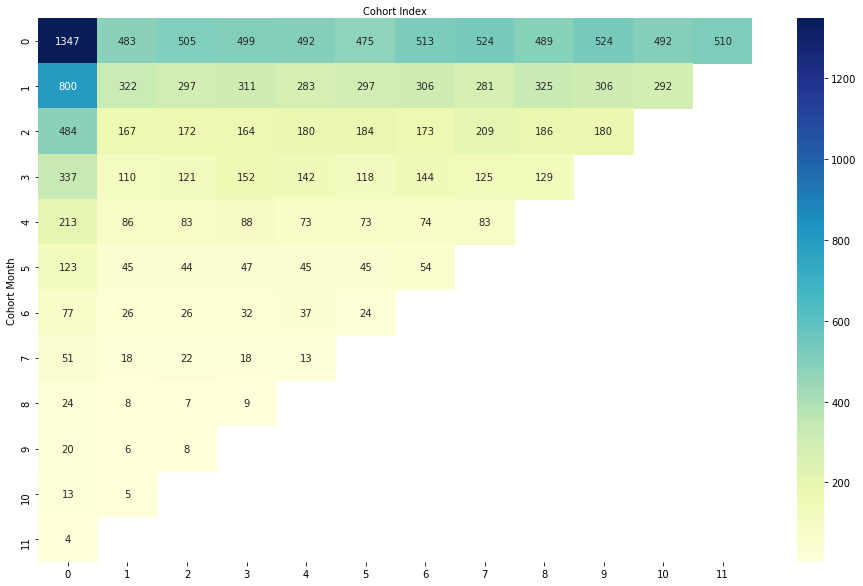

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df8, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Month")
ax.xaxis.set_label_position('top')

plt.show()

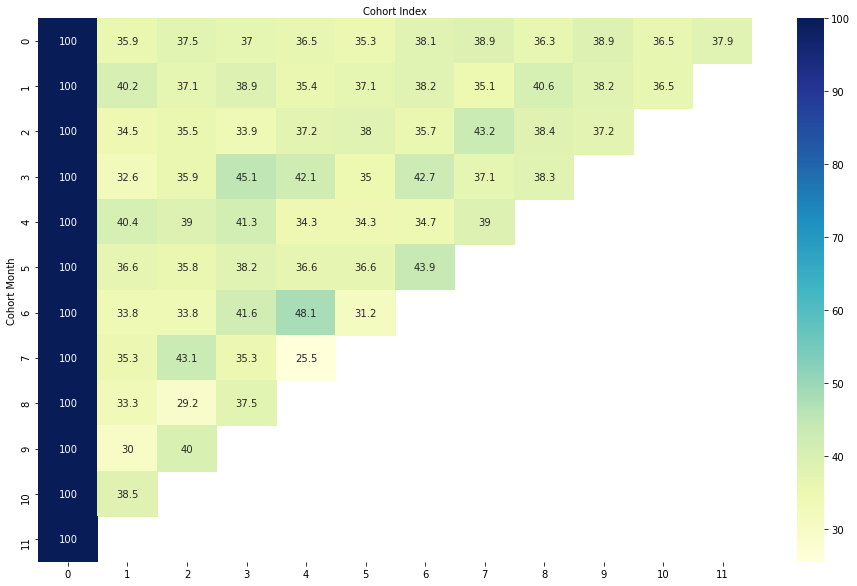

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df9, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Month")
ax.xaxis.set_label_position('top')

plt.show()